![](img/the_real_reason.png)

# Tutorial Overview

Original title:
~~Deep Neural Networks with PyTorch~~

Better title:
PyTorch: Deep Neural Networks and more


```
Description

Learn PyTorch and implement deep neural networks (and classic machine learning models).
This is a hands on tutorial which is geared toward people who are new to PyTorch.

PyTorch is a relatively new neural network library which offers a nice tensor library, automatic differentiation for gradient descent, strong and easy gpu support, dynamic neural networks, and is easy to debug.
Abstract

We will cover:
- Machine Learning 101 recap: model + loss + optimization
- PyTorch basics - tensors (and variables)
- automatic differentiation and gradient descent
- PyTorch's take on neural networks
- Deep neural networks / convolutional networks for computer vision
- transfer learning and fine-tuning
- build your convolutional network from scratch

If there is time left we might touch on:
- Implement a Recurrent Neural Networks (RNN) from scratch
- Simple recommender engines/collaborative filtering

Goals:
- understand PyTorch's concepts
- be able to use transfer learning in PyTorch
- build simple PyTorch models from scratch

Prerequisites:
- you have implemented machine learning models yourself
- you know what deep learning is
- you have used numpy
- maybe you have used tensorflow or similar libs
- if you use PyTorch on a daily basis, this tutorial is probably not for you

Materials will be made available via https://github.com/sotte/pytorch_tutorial. Please install the dependencies as instructed in the README.md.
```

In [1]:
import torch
torch.__version__

'0.4.0'

In [2]:
import torchvision
torchvision.__version__

'0.2.1'

In [3]:
import numpy as np
np.__version__

'1.14.2'

## Init, helpers, utils, ...

In [29]:
import matplotlib.pyplot as plt
from pprint import pprint

from IPython.core.debugger import set_trace

%matplotlib inline

In [5]:
from ppt.utils import attr

# PyTorch Overview


 *"Tensors and Dynamic neural networks in Python
with strong GPU acceleration.
PyTorch is a deep learning framework for fast, flexible experimentation."
-- https://pytorch.org/*

![](img/dynamic_graph.gif)

Properties:
- *define by run* vs *define and run*

## References
- Twitter: https://twitter.com/PyTorch
- Tutorials: https://pytorch.org/tutorials/
- Examples: https://github.com/pytorch/examples
- API Reference: https://pytorch.org/docs/stable/index.html
- Torchvision: https://pytorch.org/docs/stable/torchvision/index.html
- PyTorch Text: https://github.com/pytorch/text
- Facebook AI Research Sequence-to-Sequence Toolkit written in Python: https://github.com/pytorch/fairseq
- PyTorch Audio: https://github.com/pytorch/audio

- Stanford CS230 Deep Learning notes https://cs230-stanford.github.io

# Tensors
tensors - the atoms of machine learning

## Tensors in numpy and pytorch

In [6]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import multi_dot as mdot

In [7]:
import torch

In [8]:
# numpy
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
# torch
torch.eye(3)

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

In [10]:
# numpy
X = np.random.random((5, 3))
X

array([[0.03792107, 0.472185  , 0.89049521],
       [0.47826933, 0.8844461 , 0.78150294],
       [0.38442863, 0.92760533, 0.19913393],
       [0.20244609, 0.61050799, 0.02621915],
       [0.07802233, 0.28982078, 0.72732648]])

In [11]:
# pytorch
Y = torch.rand((5, 3))
Y

tensor([[ 0.6485,  0.7217,  0.0995],
        [ 0.1432,  0.1472,  0.8671],
        [ 0.0879,  0.4266,  0.9226],
        [ 0.9578,  0.1186,  0.4569],
        [ 0.4601,  0.7337,  0.7099]])

In [12]:
X.shape

(5, 3)

In [13]:
Y.shape

torch.Size([5, 3])

In [14]:
# numpy
X.T @ X

array([[0.42503683, 0.9437147 , 0.54614588],
       [0.9437147 , 2.32237131, 1.52319473],
       [0.54614588, 1.52319473, 1.97307415]])

In [15]:
# torch
Y.t() @ Y

tensor([[ 1.5779,  0.9778,  1.0340],
        [ 0.9778,  1.2769,  1.1681],
        [ 1.0340,  1.1681,  2.3258]])

In [16]:
# numpy
inv(X.T @ X)

array([[ 27.69545627, -12.61223402,   2.07043871],
       [-12.61223402,   6.61572091,  -1.61621478],
       [  2.07043871,  -1.61621478,   1.18142963]])

In [17]:
# torch
torch.inverse(Y.t() @ Y)

tensor([[ 1.2290, -0.8162, -0.1365],
        [-0.8162,  1.9908, -0.6370],
        [-0.1365, -0.6370,  0.8106]])

## More on PyTorch Tensors

Operations are also available as methods.

In [18]:
A = torch.eye(3)
A.add(1)

tensor([[ 2.,  1.,  1.],
        [ 1.,  2.,  1.],
        [ 1.,  1.,  2.]])

In [19]:
A

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

Any operation that mutates a tensor in-place is post-fixed with an _. For example: x.copy_(y), x.t_(), will change x.

In [20]:
A.add_(1)
A

tensor([[ 2.,  1.,  1.],
        [ 1.,  2.,  1.],
        [ 1.,  1.,  2.]])

## Indexing and broadcasting
It works as expected:

In [21]:
A[0, 0]

tensor(2.)

In [22]:
A[0]

tensor([ 2.,  1.,  1.])

In [23]:
A[0:2]

tensor([[ 2.,  1.,  1.],
        [ 1.,  2.,  1.]])

In [24]:
A[:, 1:3]

tensor([[ 1.,  1.],
        [ 2.,  1.],
        [ 1.,  2.]])

## Converting

In [25]:
A = torch.eye(3)
A

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

In [26]:
# torch --> numpy
A.numpy()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [27]:
# numpy --> torch
torch.from_numpy(np.eye(3))

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]], dtype=torch.float64)

# ML 101 Recap
Linear regression:

1. Model:
  - $\hat y = X \beta$

2. Loss / criterion:
  - $ err_i = y_i - f(X_i)$
  - $MSE = \frac{1}{n} \sum_{i=1}^{N} err_i^2$
  
3. Optimize:
  - minimize the MSE yields the optimal $\hat\beta$ (after doing some math)
  - $\hat\beta = (X^TX)^{-1}X^Ty$

## ML 101 with numpy

In [28]:
X = np.random.random((5, 3))
y = np.random.random(5)
X.shape, y.shape

((5, 3), (5,))

$\hat\beta = (X^T X)^{-1} X^T y$

In [29]:
XT = X.T  # transpose

beta_ = mdot([inv(XT @ X), XT, y])
beta_

array([ 0.98329888,  0.61396748, -0.47472537])

In [30]:
XT = X.T  # transpose

beta_ = inv(XT @ X) @ XT @ y
beta_

array([ 0.98329888,  0.61396748, -0.47472537])

The model $f$:

In [31]:
def f(X, beta):
    return X @ beta

f(X, beta_)

array([0.50358542, 0.34814743, 0.66205603, 1.03598398, 0.15726897])

## ML 101 with PyTorch

In [32]:
import torch

In [33]:
# X = torch.rand((5, 3))
X = torch.from_numpy(X)
# y = torch.rand(5)
y = torch.from_numpy(y)
X.shape, y.shape

(torch.Size([5, 3]), torch.Size([5]))

$\hat\beta = (X^T X)^{-1} X^T y$

In [34]:
XT = X.t()

beta__ = (XT @ X).inverse() @ XT @ y
beta__

tensor([ 0.9833,  0.6140, -0.4747], dtype=torch.float64)

In [35]:
beta__.numpy() - beta_

array([ 1.88737914e-15, -1.99840144e-15,  2.66453526e-15])

## ML 101 with PyTorch and Gradent Descent

Previously, we had to do some math to calculate the optimal $\hat\beta$.
PyTorch calculates the gradients for us automatically (more on that later)
and we can use some version of gradient desctent to find our $\hat\beta$.

In [36]:
from sklearn.datasets import make_regression

n_features = 1
n_samples = 100

X, y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=10,
)

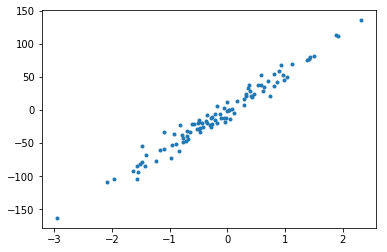

In [37]:
fix, ax = plt.subplots()
ax.plot(X, y, ".")

In [38]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape((n_samples, n_features))).float()

In [39]:
from torch import nn

class LinReg(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.beta = nn.Linear(input_dim, 1)
        
    def forward(self, X):
        return self.beta(X)


model = LinReg(n_features)

In [40]:
criterion = nn.MSELoss()

In [41]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.0001)

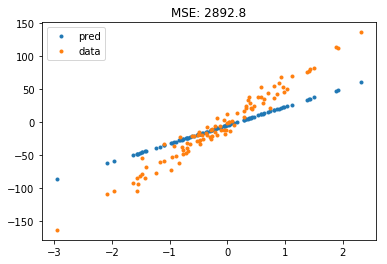

In [42]:
# Train
model.train()
optimizer.zero_grad()

y_ = model.forward(X)

loss = criterion(y_, y)
loss.backward(loss)
optimizer.step()

# Eval
model.eval()
with torch.no_grad():
    y_ = model(X)
    

# Vis
fig, ax = plt.subplots()
ax.plot(X.numpy(), y_.numpy(), ".", label="pred")
ax.plot(X.numpy(), y.numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();

In [43]:
model.beta

Linear(in_features=1, out_features=1, bias=True)

In [44]:
model.beta.weight

Parameter containing:
tensor([[ 27.8814]])

In [45]:
model.beta.weight.data

tensor([[ 27.8814]])

# TODO Freeze parameters / weights

In [46]:
pprint(list(model.parameters()))

[Parameter containing:
tensor([[ 27.8814]]),
 Parameter containing:
tensor([-4.4545])]


In [47]:
for p in model.parameters():
    print(p)
    print("Trainable:", p.requires_grad)
    print()

Parameter containing:
tensor([[ 27.8814]])
Trainable: True

Parameter containing:
tensor([-4.4545])
Trainable: True



In [48]:
def get_trainable(model_params):
    return filter(lambda param: param.requires_grad, model_params)


def get_frozen(model_params):
    return filter(lambda param: not param.requires_grad, model_params)


def all_trainable(model_params):
    return all(p.requires_grad for p in model_params)


def all_frozen(model_params):
    return all(not p.requires_grad for p in model_params)


list(get_trainable(model.parameters()))
list(get_frozen(model.parameters()))
all_trainable(model.parameters())
all_frozen(model.parameters())

False

# But what about the GPU?
How do I use the GPU?

If you have a GPU make sure that the right pytorch is installed

```
conda install pytorch torchvision cuda91 -c pytorch
```
Check https://pytorch.org/ for details.

In [49]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

If you have a GPU you should get something like: `device(type='cuda', index=0)`

You can move data to the GPU by doing `.to(device)`.

In [50]:
data = torch.eye(3)
data.to(device)

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]], device='cuda:0')

Note: before `v0.4` one had to use `.cuda()` and `.cpu()` to move stuff to and from the GPU.
This littered the code with many:
```
if CUDA: model = model.cuda()
```

## LinReg with GPU

Simply move the data to the GPU.

In [51]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = LinReg(n_features).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.00001)
criterion = nn.MSELoss()

X, y = X.to(device), y.to(device)

The rest stays the same.

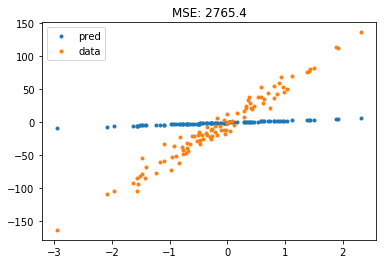

In [52]:
# Train
model.train()
optimizer.zero_grad()

y_ = model.forward(X)
loss = criterion(y_, y)

loss.backward(loss)
optimizer.step()

# Eval
model.eval()
with torch.no_grad():
    y_ = model(X)    

# Vis
fig, ax = plt.subplots()
ax.plot(X.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(X.cpu().numpy(), y.cpu().numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();

- TODO Optimizer on GPU
- TODO loss on GPU

# Autograd
Automatic differentiation with PyTorch.
We already used it: `loss.backward()`

Prior to `v0.4` PyTorch used the class `Variable` to record gradients by wrapping `Tensor`s.
`Variable`s behaved like `Tensors`.
With `v0.4` `Tensor` can record the gradient if you tell it do do so, e.g. `torch.ones(3, requires_grad=True)`.

Ref:
- https://pytorch.org/docs/stable/autograd.html
- https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

In [53]:
w = torch.ones(1)
w.requires_grad

False

In [54]:
z = torch.ones(1) * 2
z.requires_grad

False

In [55]:
total = w + z
total

tensor([ 3.])

In [56]:
# What is going to happen here?
total.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
w = torch.ones(1, requires_grad=True)
w.requires_grad

In [ ]:
total = w + z
total.requires_grad

In [57]:
total.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [58]:
w.grad

In [59]:
with torch.no_grad():
    total = w + z

total.requires_grad

False

## TODO Experiments with Autograds

In [60]:
def my_pow(x, n=2):
    res = torch.ones_like(x, requires_grad=True)
    for _ in range(n):
        res = res * x
    return res


x = torch.ones(1) * 2
assert my_pow(x, 0).item() == 1.0
assert my_pow(x, 1).item() == 2.0
assert my_pow(x, 2).item() == 4.0
assert my_pow(x, 3).item() == 8.0
assert my_pow(x, 4).item() == 16.0

In [61]:
x = torch.ones(1, requires_grad=False) * 2

res = my_pow(x, 2)
print(res.requires_grad)
res.backward()
x.grad

True


# Debugging

**Q: "No debugger for your code. What do you think?"**

**A: "I would NOT be able to code!"**

- Who does "print-line-debugging"?
- Who likes debugging in tensorflow?
- What is the intersection of those two groups?


## IPDB cheatsheet
Taken from http://frid.github.io/blog/2014/06/05/python-ipdb-cheatsheet/

- h(help): Print help

- n(ext): Continue execution until the next line in the current function is reached or it returns.
- s(tep): Execute the current line, stop at the first possible occasion (either in a function that is called or in the current function).
- r(eturn): Continue execution until the current function returns.

- r(eturn): Continue execution until the current function returns.
- a(rgs): Print the argument list of the current function.

In [62]:
from IPython.core.debugger import set_trace

In [63]:
def my_function(x):
    answer = 42
    # set_trace()
    answer += x
    return answer

my_function(12)

54

## Example: debuging a NN

In [64]:
X = torch.rand((5, 3))
X

tensor([[ 0.2107,  0.7328,  0.4285],
        [ 0.7998,  0.3209,  0.5599],
        [ 0.7167,  0.7644,  0.6845],
        [ 0.9939,  0.0771,  0.3096],
        [ 0.7311,  0.2140,  0.3246]])

In [65]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(3, 1)
    
    def forward(self, X):
        # set_trace()
        x = self.lin(X)
        return X

model = MyModule()
y_ = model(X)

# assert y_.shape == (5, 1), y_.shape

# Recap - what we learned so far
- tensor like numpy
- model, loss, optimizer
- Use `nn.Module` to create your own networks
- Automatic differentiation!
- Debuggable!

# Datset, Dataloader, Sampler, Transforms

## Dataset
`Dataset` gives you information about the number of samples (implement `__len__`) and gives you the sample at a given index (implement `__getitem__`.
It's a nice and simple abstraction to work with data.

In [71]:
from ppt.utils import DogsCatsDataset

In [72]:
train_ds = DogsCatsDataset("../data/raw", "sample/train")

Loading data from ../data/raw/dogscats/sample/train.


In [86]:
!tree -d ../data/raw/

../data/raw/
└── dogscats
    ├── models
    ├── sample
    │   ├── train
    │   │   ├── cats
    │   │   └── dogs
    │   └── valid
    │       ├── cats
    │       └── dogs
    ├── test1
    ├── train
    │   ├── cats
    │   └── dogs
    └── valid
        ├── cats
        └── dogs

16 directories


In [73]:
train_ds

Dataset DogsCatsDataset
    Number of datapoints: 16
    Root Location: ../data/raw/dogscats/sample/train
    Transforms (if any): None
    Target Transforms (if any): None

In [74]:
len(train_ds)

16

In [75]:
train_ds[0]

(<PIL.Image.Image image mode=RGB size=499x375 at 0x7F0C984FD358>, 0)

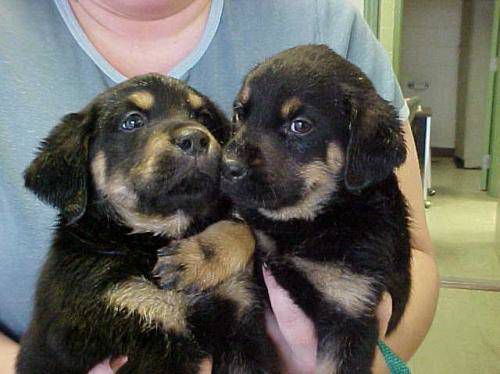

In [92]:
train_ds[14][0]

Optionally, datasets offer some convenience functions.
This is not enforced by the interface

In [79]:
train_ds.classes

['cats', 'dogs']

In [80]:
train_ds.class_to_idx

{'cats': 0, 'dogs': 1}

In [81]:
train_ds.imgs

[('../data/raw/dogscats/sample/train/cats/cat.11737.jpg', 0),
 ('../data/raw/dogscats/sample/train/cats/cat.2266.jpg', 0),
 ('../data/raw/dogscats/sample/train/cats/cat.2921.jpg', 0),
 ('../data/raw/dogscats/sample/train/cats/cat.3570.jpg', 0),
 ('../data/raw/dogscats/sample/train/cats/cat.394.jpg', 0),
 ('../data/raw/dogscats/sample/train/cats/cat.4600.jpg', 0),
 ('../data/raw/dogscats/sample/train/cats/cat.4865.jpg', 0),
 ('../data/raw/dogscats/sample/train/cats/cat.9021.jpg', 0),
 ('../data/raw/dogscats/sample/train/dogs/dog.1402.jpg', 1),
 ('../data/raw/dogscats/sample/train/dogs/dog.1614.jpg', 1),
 ('../data/raw/dogscats/sample/train/dogs/dog.2423.jpg', 1),
 ('../data/raw/dogscats/sample/train/dogs/dog.6391.jpg', 1),
 ('../data/raw/dogscats/sample/train/dogs/dog.6768.jpg', 1),
 ('../data/raw/dogscats/sample/train/dogs/dog.8091.jpg', 1),
 ('../data/raw/dogscats/sample/train/dogs/dog.8643.jpg', 1),
 ('../data/raw/dogscats/sample/train/dogs/dog.9077.jpg', 1)]

0 cats


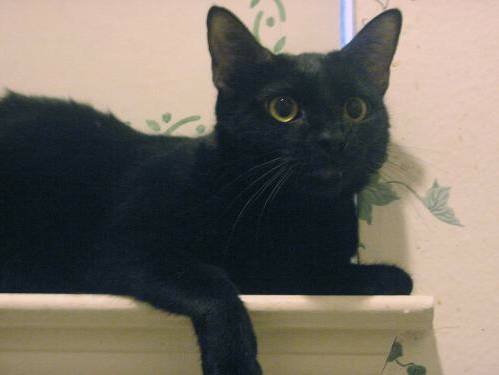

0 cats


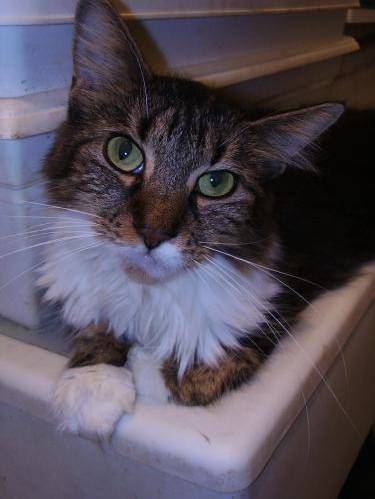

0 cats


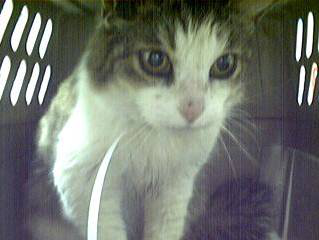

0 cats


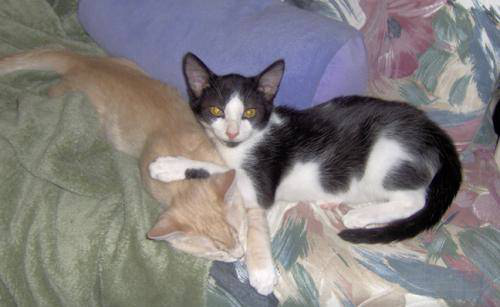

0 cats


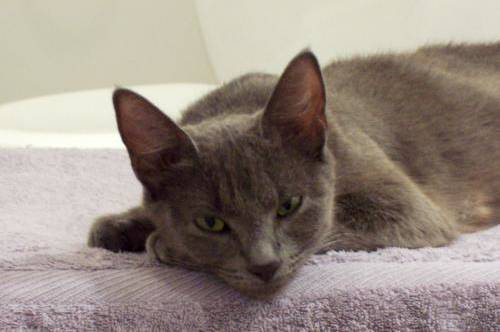

0 cats


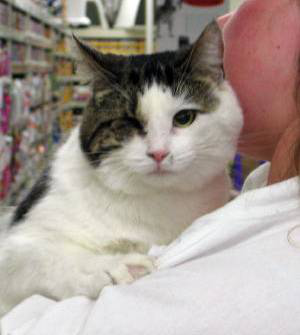

0 cats


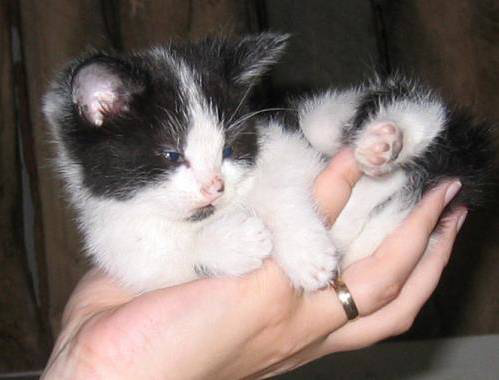

0 cats


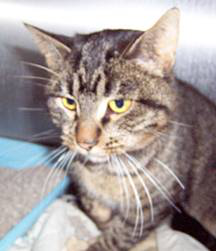

1 dogs


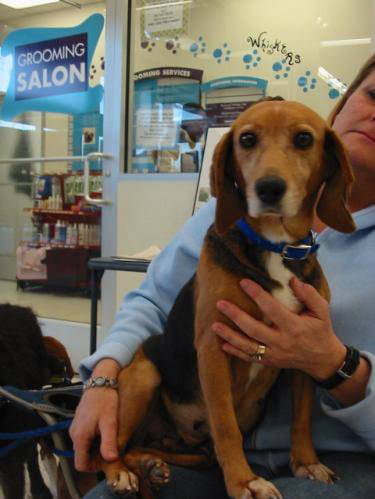

1 dogs


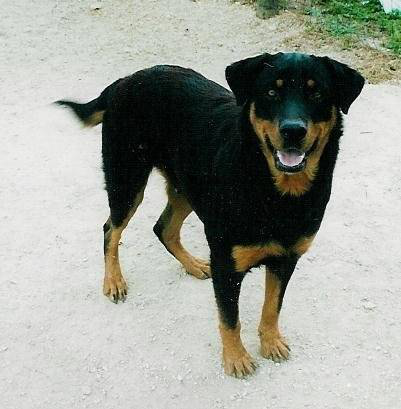

1 dogs


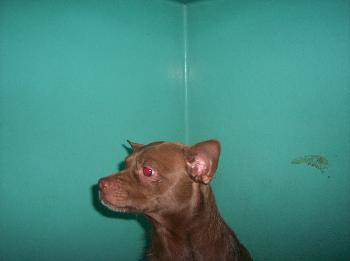

1 dogs


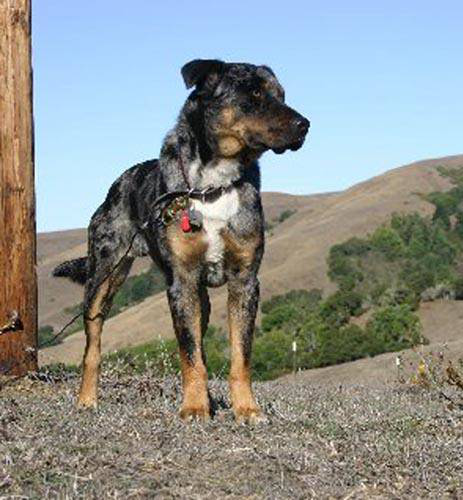

1 dogs


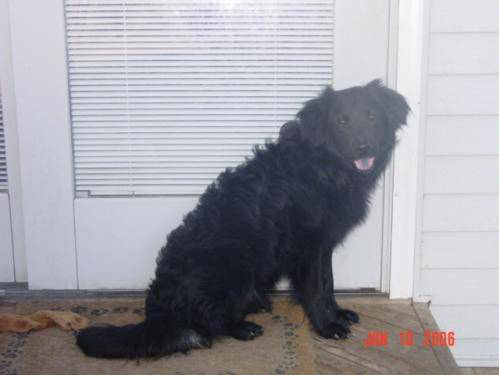

1 dogs


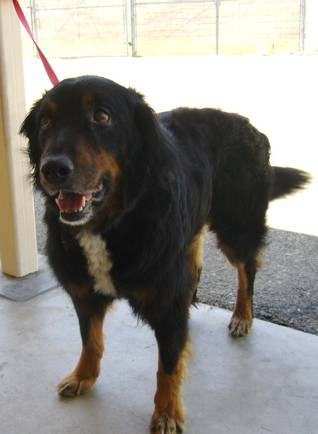

1 dogs


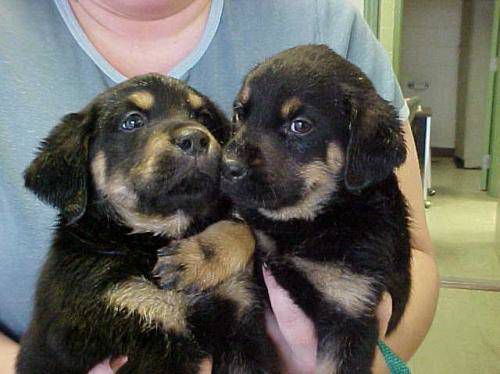

1 dogs


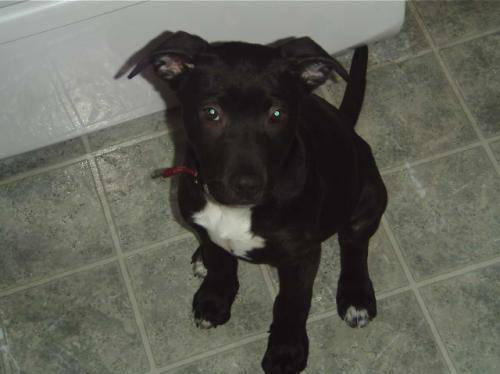

In [85]:
for img, label_id in train_ds:
    print(label_id, train_ds.classes[label_id])
    display(img)

## Transforms

Common image transformation that can be composed/chained.

In [442]:
from torchvision import transforms

IMG_SIZE = 224
_mean = [0.485, 0.456, 0.406]
_std = [0.229, 0.224, 0.225]


trans = transforms.Compose([
    transforms.RandomCrop(IMG_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(.3, .3, .3),
    transforms.ToTensor(),
    transforms.Normalize(_mean, _std),
])

trans(train_ds[13][0])

tensor([[[ 2.2489,  2.2489,  2.2489,  ..., -1.2103, -1.2103, -1.3815],
         [ 2.2489,  2.2489,  2.2489,  ..., -1.3130, -1.3987, -1.5014],
         [ 2.2489,  2.2489,  2.2489,  ..., -1.3644, -1.4843, -1.5699],
         ...,
         [ 1.7694,  1.7694,  1.7523,  ..., -0.5253, -0.6794, -0.7137],
         [ 1.7694,  1.7694,  1.7523,  ..., -0.5596, -0.6965, -0.7308],
         [ 1.8379,  1.8379,  1.8893,  ..., -0.5767, -0.6794, -0.6965]],

        [[ 2.4286,  2.4286,  2.4286,  ..., -1.2479, -1.2479, -1.3004],
         [ 2.4286,  2.4286,  2.4286,  ..., -1.3004, -1.3354, -1.4580],
         [ 2.4286,  2.4286,  2.4286,  ..., -1.3704, -1.4055, -1.4930],
         ...,
         [ 2.2010,  2.2010,  2.1835,  ..., -1.3880, -1.4405, -1.4055],
         [ 2.2010,  2.2010,  2.1835,  ..., -1.4055, -1.4580, -1.4230],
         [ 2.2010,  2.2360,  2.2535,  ..., -1.3880, -1.4405, -1.3880]],

        [[ 2.6400,  2.6400,  2.6400,  ..., -1.0898, -1.0898, -1.1421],
         [ 2.6400,  2.6400,  2.6400,  ..., -1

Ref:
- https://pytorch.org/docs/stable/torchvision/transforms.htm
- https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
- https://github.com/uploadcare/pillow-simd and http://python-pillow.org/pillow-perf/
- https://github.com/mdbloice/Augmentor
- https://github.com/aleju/imgaug

## Dataloader
Batch loading for datasets with multi-processing and different sample strategies.

In [443]:
from torch.utils.data import DataLoader

DataLoader?

Init signature: DataLoader(dataset, batch_size=1, shuffle=False, sampler=None, batch_sampler=None, num_workers=0, collate_fn=<function default_collate at 0x7f0caf96af28>, pin_memory=False, drop_last=False, timeout=0, worker_init_fn=None)
Docstring:     
Data loader. Combines a dataset and a sampler, and provides
single- or multi-process iterators over the dataset.

Arguments:
    dataset (Dataset): dataset from which to load the data.
    batch_size (int, optional): how many samples per batch to load
        (default: 1).
    shuffle (bool, optional): set to ``True`` to have the data reshuffled
        at every epoch (default: False).
    sampler (Sampler, optional): defines the strategy to draw samples from
        the dataset. If specified, ``shuffle`` must be False.
    batch_sampler (Sampler, optional): like sampler, but returns a batch of
        indices at a time. Mutually exclusive with batch_size, shuffle,
        sampler, and drop_last.
    num_workers (int, optional): how man

In [446]:
train_dl = DataLoader(train_ds, batch_size=2, shuffle=True, num_workers=4)

train_iter = iter(train_dl)
next(train_iter)

TypeError: Traceback (most recent call last):
  File "/home/stefan/anaconda3/envs/pydata_pytorch_tutorial/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 57, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/stefan/anaconda3/envs/pydata_pytorch_tutorial/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 138, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/home/stefan/anaconda3/envs/pydata_pytorch_tutorial/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 138, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/home/stefan/anaconda3/envs/pydata_pytorch_tutorial/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 140, in default_collate
    raise TypeError((error_msg.format(type(batch[0]))))
TypeError: batch must contain tensors, numbers, dicts or lists; found <class 'PIL.Image.Image'>


In [452]:
train_ds = DogsCatsDataset("../data/raw", "sample/train", transform=trans)
train_dl = DataLoader(train_ds, batch_size=2, shuffle=True, num_workers=4)

train_iter = iter(train_dl)
X, y = next(train_iter)

print(X.shape, y.shape)
y

Loading data from ../data/raw/dogscats/sample/train.
torch.Size([2, 3, 224, 224]) torch.Size([2])


tensor([ 0,  1])

## Sampler
`Sampler` define how to sample from the dataset.

Examples:
- `SequentialSampler`
- `RandomSamples`
- `SubsetSampler`
- `WeightedRandomSampler`

Write your own by simply implementing `__iter__` to iterate over the indices of the dataset.

Ref:
- https://pytorch.org/docs/stable/data.html#torch.utils.data.sampler.Sampler

# Full Example

In [72]:
# rm -r data

In [73]:
from utils import DogsCatsDataset

train_ds = DogsCatsDataset("data/dogscats", "sample/train", download=False)

RuntimeError: Dataset not found or corrupted. You can use download=True to download it

In [66]:
import torch.nn as nn
import torch.nn.functional as F

class MyNet(nn.Module):
    def __init__(self,
                 n_input: int,
                 n_hidden: int,
                 n_out: int):
        
        super().__init__()
        self.lin1 = nn.Linear(n_input, n_hidden)
        self.lin2 = nn.Linear(n_hidden, n_out)
    
    def forward(self, X: torch.Tensor):
        res = F.relu(self.lin1(X))
        res = self.lin2(res)
        return res
    
    
model = MyNet(4, 8, 3)

The loss function

In [67]:
criterion = nn.CrossEntropyLoss()

The optimizer

In [68]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)

The data

In [69]:
from ppt import utils


train_ds = utils.DogsCatsDataset()

In [ ]:
train_ds

In [ ]:
ls data/dogscats/dogscats/sample

# Write your own dataset

In [70]:
from torch.utils.data import Dataset


class MyData(Dataset):
    def __init__(self):
        super().__init__()
        
    def __len__(self):
        return 0
    
    def __getitem__(self, idx):
        return None

# Visualization

# Linear Regression with PyTorch
# Simple Neural Network
# Conv Net

# Detour: K-Means in PyTorch

# PyTorch Outlook
- [0.4 "just" released](https://pytorch.org/2018/04/22/0_4_0-migration-guide.html)
  - `Tensors` and `Variables` have merged
  - Support for 0-dimensional (scalar) Tensors
  - Deprecation of the `volatile` flag
  
- [The road to 1.0: production ready PyTorch](https://pytorch.org/2018/05/02/road-to-1.0.html)
  - `torch.jit`
  - optimize for mobile
  - quantized inference (such as 8-bit inference)
  - caffe2 merget into pytorch repo
  - ONNX - Open Neural Network Exchange

In [ ]:
import torch.jit

In [ ]:
from torch.jit import script

@script
def rnn_loop(x):
    hidden = None
    for x_t in x.split(1):
        x, hidden = model(x, hidden)
    return x